In [15]:
import numpy as np
import matplotlib.pyplot as plt
import keras

# For importing pre prepared dataset with more complex geometry from sklearn
from sklearn import datasets

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [16]:
n_pts = 500
# X for datapoints and y for labels
# labels for outer circular data points is 0 (negative region) and
# for inner circle as 1 (positive region)
# random_state equals a random integer. By doing so it will allow us to seed our
# random generator to get same random numbers each time
# noise = referes to standard deviation of the gausian noise added to function.
# Large noise value (like 0.8) results in more clustered and less organized data
# points to deviate from standard shape. It will cause the data points to become
# overly convoluted, making it a lot harder to classify the data.
# noise values of 0 will give us a perfect circle
# factor refers to relative size of the smaller inner circle region to the
# larger outer circle. factor value of 1 implies that both circle are going to
# the same size. And a value of 0.2 means that the diameter of the inner circle
# is 20% of the diameter of the outer circle
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)

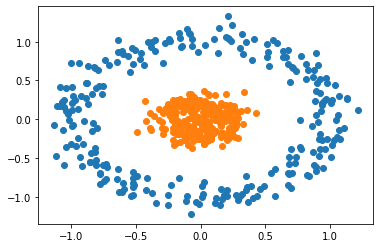

In [17]:
# X[y==0, 0] is a boolean check to grabs all x coordinates, which have a lebel
# of 0 (y==0) at first column which is 0th index
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [18]:
model = Sequential()
# Adding input later and first hidden layer

# Add a dense network connection with a hidden layer of 4 nodes. Very low number
# of nodes can drastically reduce the accuracy of the network, while having too
# many nodes can lead to overfitting of the data. number of nodes at input layer
# is 2. The sigmoid activation fucntion is used.
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))

# Definiing the output layer with 1 node. Input layer of the output layer does
# not need to be defined, because it is already defined
model.add(Dense(1, activation='sigmoid'))

# The structure of the deep neural network is now complete. We now take it and
# compile it using the adam optimizer with learning rate of 0.01
# Once again as our dataset has only two categories, binary cross entropy 
# argument will be used, for distinguishing between class of 0s and 1s
# matric is very similar to loss function, and the main difference is that the
# results form the loss function are actually backpropagated through the network
# whereas the metric data is not used to train the network and acts more like a
# tool for the evaluation of the performance of the data.
# metrics=['accuracy'] essentially calculates the accuracy of how often the
# model's predictions match the labels of our data
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])

In [19]:
# Train the deep neural network to come up with a model that best classifies our
# data.
# x=X indicates the training data that will be used to train our model and 
# y=y is the corresponding labels that we assigned to each datapoint
# verbose = 1 shows a progress bar of information relating to the performance of
# our model at each epoch
# batch_size = 20 will distribute our 500 datapoints to 25 batches of 20 points
# We need to feed the full dataset through our neural network multiple times to
# ensure an optimized results, so that it keeps updating the weights and bias of
# our network in the direction that decreases the error function the most
# shuffle='true' shuffles our data before each epoch to ensure that it doesn't
# stuck in a local minimum
h = model.fit(x=X, y=y, verbose=1, batch_size=20, epochs=100, shuffle='true')

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7179 - accuracy: 0.5089
Epoch 2/100
25/25 [==============================] - 0s 978us/step - loss: 0.6912 - accuracy: 0.4482
Epoch 3/100
25/25 [==============================] - 0s 942us/step - loss: 0.6937 - accuracy: 0.6015
Epoch 4/100
25/25 [==============================] - 0s 909us/step - loss: 0.6908 - accuracy: 0.6967
Epoch 5/100
25/25 [==============================] - 0s 942us/step - loss: 0.6921 - accuracy: 0.5770
Epoch 6/100
25/25 [==============================] - 0s 919us/step - loss: 0.6908 - accuracy: 0.6072
Epoch 7/100
25/25 [==============================] - 0s 900us/step - loss: 0.6906 - accuracy: 0.5122
Epoch 8/100
25/25 [==============================] - 0s 965us/step - loss: 0.6896 - accuracy: 0.6440
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.5361
Epoch 10/100
25/25 [==============================] - 0s 976us/step - loss: 0.6860 - accuracy: 

Text(0.5, 1.0, 'accuracy')

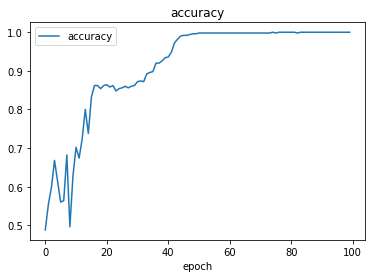

In [20]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Comparing to our previous dataset, we can see here our data reached a high accuracy after around 60 epochs. However, the previous simpler dataset reached the similar accuracy after about 10 epochs

Text(0.5, 1.0, 'loss')

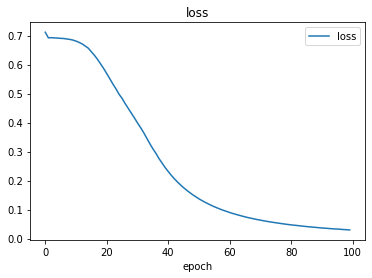

In [21]:
 plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

But here we can see that the full 100 epochs was required for our loss function te get minimized.

In [24]:
# Plotting our dataset along with the precise decision boundary that our model
# was trained to come up with

#Taken form the perceptron notebook.
# Tolerance value of 1 is replaced with 0.25 as it shows better results here
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

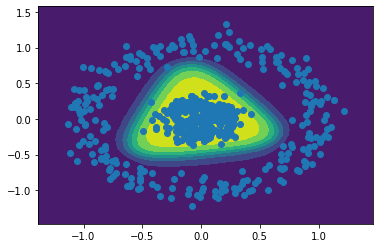

In [25]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Prediction is:  [[0.04169863]]


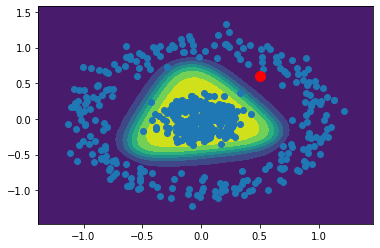

In [30]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0.5
y = 0.6
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print("Prediction is: ", prediction)

Prediction is:  [[0.99075544]]


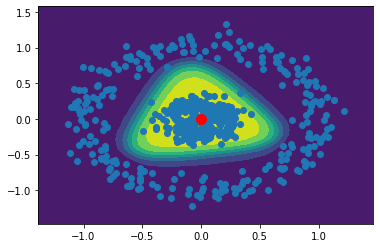

In [31]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0
y = 0
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print("Prediction is: ", prediction)